In [1]:
# initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, assemble

# import basic plot tools
from qiskit.visualization import plot_histogram

In [42]:
def bv_algorithm(s, n):
    # We need a circuit with n qubits, plus one auxiliary qubit
    # Also need n classical bits to write the output to
    bv_circuit = QuantumCircuit(n+1, n)

    # put auxiliary in state |->
    bv_circuit.h(n)
    bv_circuit.z(n)

    # Apply Hadamard gates before querying the oracle
    for i in range(n):
        bv_circuit.h(i)

    # Apply barrier 
    bv_circuit.barrier()

    # Apply the inner-product oracle
    s = s[::-1] # reverse s to fit qiskit's qubit ordering
    for q in range(n):
        if s[q] == '0':
            bv_circuit.i(q)
        else:
            bv_circuit.cx(q, n)

    # Apply barrier 
    bv_circuit.barrier()

    #Apply Hadamard gates after querying the oracle
    for i in range(n):
        bv_circuit.h(i)
    
    # Measurement
    for i in range(n):
        bv_circuit.measure(i, i)
    
    return bv_circuit

In [43]:
n = 4 # number of qubits used to represent s
s = '1110'   # the hidden binary string
bv_circuit = bv_algorithm(s, n)

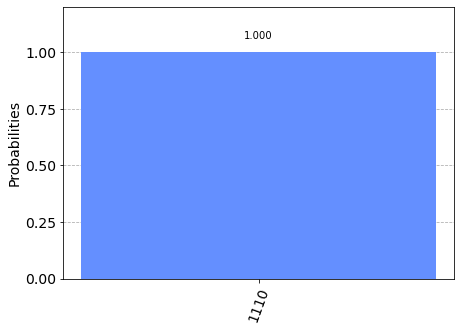

In [44]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
qobj = assemble(bv_circuit)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

In [45]:
def bv(s, n):
    n = int(n)
    bv_circuit = bv_algorithm(s, n)
    print("Non Transpiled Circuit")
    print(bv_circuit)
    aer_sim = Aer.get_backend('aer_simulator')
    tranpiled_bv = transpile(bv_circuit, aer_sim)
    print("Transpiled Circuit")
    print(tranpiled_bv)
    return tranpiled_bv

In [46]:
bv(s,n)

Non Transpiled Circuit
     ┌───┐      ░ ┌───┐           ░ ┌───┐┌─┐         
q_0: ┤ H ├──────░─┤ I ├───────────░─┤ H ├┤M├─────────
     ├───┤      ░ └───┘           ░ ├───┤└╥┘┌─┐      
q_1: ┤ H ├──────░───■─────────────░─┤ H ├─╫─┤M├──────
     ├───┤      ░   │             ░ ├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├──────░───┼────■────────░─┤ H ├─╫──╫─┤M├───
     ├───┤      ░   │    │        ░ ├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├──────░───┼────┼────■───░─┤ H ├─╫──╫──╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘ ║  ║  ║ └╥┘
q_4: ┤ H ├┤ Z ├─░─┤ X ├┤ X ├┤ X ├─░───────╫──╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘└───┘ ░       ║  ║  ║  ║ 
c: 4/═════════════════════════════════════╩══╩══╩══╩═
                                          0  1  2  3 
Transpiled Circuit
         ┌───┐     ░                 ░ ┌───┐┌─┐         
q_0: ────┤ H ├─────░─────────────────░─┤ H ├┤M├─────────
         ├───┤     ░                 ░ ├───┤└╥┘┌─┐      
q_1: ────┤ H ├─────░───■─────────────░─┤ H ├─╫─┤M├──────
         ├───┤     ░   │    